In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("House Price India.csv")

In [4]:
data

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
1,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
2,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
3,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
4,6762813105,42491,3,2.50,2600,4750,1.0,0,0,4,...,1951,0,122007,52.9133,-114.590,2380,4750,1,67,790000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14614,6762830250,42734,2,1.50,1556,20000,1.0,0,0,4,...,1957,0,122066,52.6191,-114.472,2250,17286,3,76,221700
14615,6762830339,42734,3,2.00,1680,7000,1.5,0,0,4,...,1968,0,122072,52.5075,-114.393,1540,7480,3,59,219200
14616,6762830618,42734,2,1.00,1070,6120,1.0,0,0,3,...,1962,0,122056,52.7289,-114.507,1130,6120,2,64,209000
14617,6762830709,42734,4,1.00,1030,6621,1.0,0,0,4,...,1955,0,122042,52.7157,-114.411,1420,6631,3,54,205000


In [6]:
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')

In [19]:
correlation_matrix = data.corr()

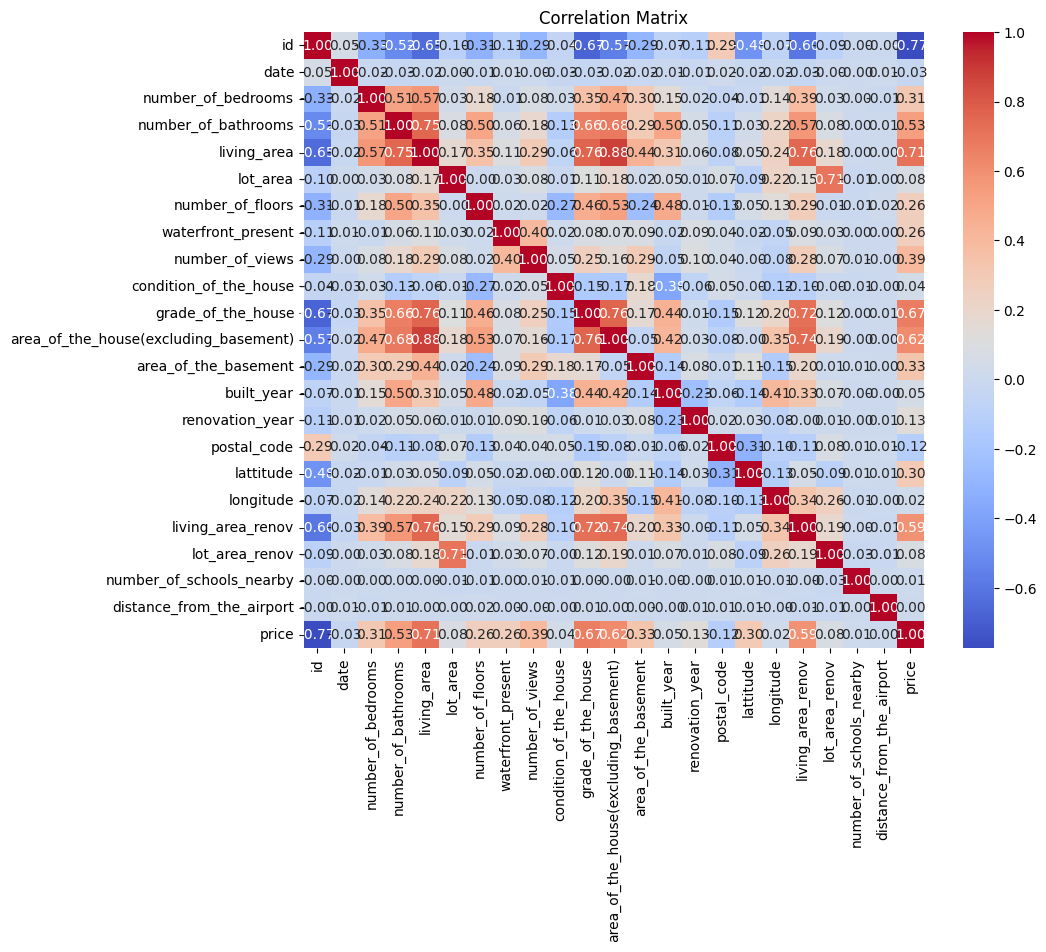

In [47]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [24]:
price_correlation = correlation_matrix['price'].abs().sort_values(ascending=False)
top_features = price_correlation[1:5]  # Exclude 'price' itself
print(top_features)

id                                       0.773268
living_area                              0.712276
grade_of_the_house                       0.671805
area_of_the_house(excluding_basement)    0.615179
Name: price, dtype: float64


In [7]:
X = data[['number_of_bedrooms', 'number_of_bathrooms', 'living_area', 'lot_area', 'built_year']]
y = data['price'] 

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [13]:
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [14]:
lr_predictions = lr_model.predict(X_test)
xgb_predictions = xgb_model.predict(X_test)

In [15]:
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)

In [16]:
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)

In [17]:
print(f'Linear Regression MSE: {lr_mse}, R^2: {lr_r2}')
print(f'XGBoost MSE: {xgb_mse}, R^2: {xgb_r2}')

Linear Regression MSE: 61210735364.56986, R^2: 0.5864029720056976
XGBoost MSE: 63575899909.19683, R^2: 0.5704216957092285


In [ ]:
basic_features = ['living_area', 'grade_of_the_house', 'area_of_the_house(excluding_basement)']
advanced_features = ['living_area', 'grade_of_the_house', 'area_of_the_house(excluding_basement)',
                    'number_of_bedrooms', 'number_of_bathrooms', 'lot_area', 
                    'number_of_floors', 'waterfront_present',
                    'condition_of_the_house', 'area_of_the_basement', 
                    'built_year', 'postal_code',]

In [26]:
y = data['price']

In [ ]:
def train_model(features):
    
    X = data[features]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

   
    model = XGBRegressor()
    model.fit(X_train, y_train)
    
    return model

In [34]:
basic_model = train_model(basic_features)
advanced_model = train_model(advanced_features)

In [ ]:
def predict_price(input_data, mode='basic'):
    if mode == 'basic':
        model = basic_model
        features = basic_features
    elif mode == 'advanced':
        model = advanced_model
        features = advanced_features
    else:
        raise ValueError("Mode must be either 'basic' or 'advanced'.")

    input_df = pd.DataFrame([input_data], columns=features)

    predicted_price = model.predict(input_df)
    
    return predicted_price[0]

In [42]:
def get_user_input(mode):
    input_data = {}
    
    if mode == 'basic':
        print("Please enter the following details for basic prediction:")
        input_data['living_area'] = float(input("Living Area (sq ft): "))
        input_data['grade_of_the_house'] = int(input("Grade of the House (1-10): "))
        input_data['area_of_the_house(excluding_basement)'] = float(input("Area of the House (excluding basement) (sq ft): "))
    
    elif mode == 'advanced':
        print("Please enter the following details for advanced prediction:")
        input_data['living_area'] = float(input("Living Area (sq ft): "))
        input_data['grade_of_the_house'] = int(input("Grade of the House (1-10): "))
        input_data['area_of_the_house(excluding_basement)'] = float(input("Area of the House (excluding basement) (sq ft): "))
        input_data['number_of_bedrooms'] = int(input("Number of Bedrooms: "))
        input_data['number_of_bathrooms'] = int(input("Number of Bathrooms: "))
        input_data['lot_area'] = float(input("Lot Area (sq ft): "))
        input_data['number_of_floors'] = int(input("Number of Floors: "))
        input_data['waterfront_present'] = int(input("Waterfront Present (1 for Yes, 0 for No): "))
        input_data['number_of_views'] = int(input("Number of Views: "))
        input_data['condition_of_the_house'] = int(input("Condition of the House (1-5): "))
        input_data['area_of_the_basement'] = float(input("Area of the Basement (sq ft): "))
        input_data['built_year'] = int(input("Built Year: "))
    
    return input_data

def main():

    mode = input("Choose prediction mode (basic/advanced): ").strip().lower()
    
    if mode not in ['basic', 'advanced']:
        print("Invalid mode selected. Please choose either 'basic' or 'advanced'.")
        return

    user_input = get_user_input(mode)

    predicted_price = predict_price(user_input, mode)
    
    print(f"Predicted Price: ₹{predicted_price:.2f}")

if __name__ == "__main__":
    main()

Please enter the following details for basic prediction:
Predicted Price: ₹299103.31
